# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/monalisa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles

bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 11767


In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 4664


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()




,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000
3,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.00,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
2,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.062153,0.054800,0.03980,0.905430
std,0.403021,0.068676,0.05374,0.083394
min,-0.762700,0.000000,0.00000,0.677000
25%,-0.091250,0.000000,0.00000,0.846250
50%,0.000000,0.000000,0.00000,0.914000
75%,0.381800,0.079250,0.07025,1.000000
max,0.845500,0.275000,0.21900,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.046682,0.047390,0.036520,0.906080
std,0.340209,0.055558,0.060494,0.122136
min,-0.918600,0.000000,0.000000,0.000000
25%,-0.083575,0.000000,0.000000,0.857250
50%,0.000000,0.046000,0.000000,0.928000
75%,0.238025,0.077250,0.068250,1.000000
max,0.822500,0.256000,0.289000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the higher mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
regex = re.compile("[^a-zA-Z ]")
 

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):

    # Remove the punctuation from text
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
     
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    
    return output

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df ["tokens"] = bitcoin_df["text"].apply(tokenizer) 
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[tesla, started, accepting, bitcoin, currency,..."
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[shares, square, american, fintech, company, r..."
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000,"[teslas, relationship, bitcoin, dalliance, acc..."
3,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, ha, stopped, accepting, ..."
4,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.00,1.000,"[cryptocurrency, price, continued, tumble, fri..."


In [14]:
bitcoin_df2 = bitcoin_df

In [15]:
# Create a new tokens column for Ethereum
ethereum_df ["tokens"] = ethereum_df["text"].apply(tokenizer) 
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, detrac..."
2,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917,"[solana, isnt, known, yet, outside, crypto, co..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000,"[new, york, cnn, businessbitcoin, price, conti..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909,"[creator, behind, cryptopunks, one, popular, n..."


In [16]:
ethereum_df2 = ethereum_df

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
bitcoin_tokens = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
bitcoin_ngram_counts = Counter(ngrams(bitcoin_tokens, n=2))


In [19]:
# Generate the Ethereum N-grams where N=2
ethereum_tokens = [item for sublist in ethereum_df.tokens.to_list() for item in sublist]
ethereum_ngram_counts = Counter(ngrams(ethereum_tokens, n=2))


In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_tokens)

[('char', 100),
 ('bitcoin', 74),
 ('tesla', 32),
 ('elon', 32),
 ('musk', 28),
 ('ha', 24),
 ('currency', 20),
 ('reuters', 20),
 ('cryptocurrency', 19),
 ('company', 16)]

In [22]:
token_count(bitcoin_ngram_counts)

[(('elon', 'musk'), 26),
 (('currency', 'bitcoin'), 11),
 (('char', 'reuters'), 10),
 (('char', 'bitcoin'), 9),
 (('virtual', 'currency'), 8),
 (('illustration', 'taken'), 8),
 (('accepting', 'bitcoin'), 6),
 (('new', 'york'), 6),
 (('elon', 'musks'), 6),
 (('tesla', 'inc'), 6)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_tokens)

[('char', 98),
 ('bitcoin', 46),
 ('ethereum', 29),
 ('ha', 28),
 ('currency', 24),
 ('cryptocurrency', 23),
 ('crypto', 18),
 ('new', 16),
 ('reuters', 16),
 ('digital', 16)]

In [24]:
token_count(ethereum_ngram_counts)

[(('char', 'bitcoin'), 11),
 (('virtual', 'currency'), 11),
 (('illustration', 'taken'), 11),
 (('representation', 'virtual'), 9),
 (('bitcoin', 'ethereum'), 8),
 (('seen', 'front'), 8),
 (('front', 'stock'), 8),
 (('stock', 'graph'), 8),
 (('graph', 'illustration'), 8),
 (('char', 'reuters'), 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0, 10.0]

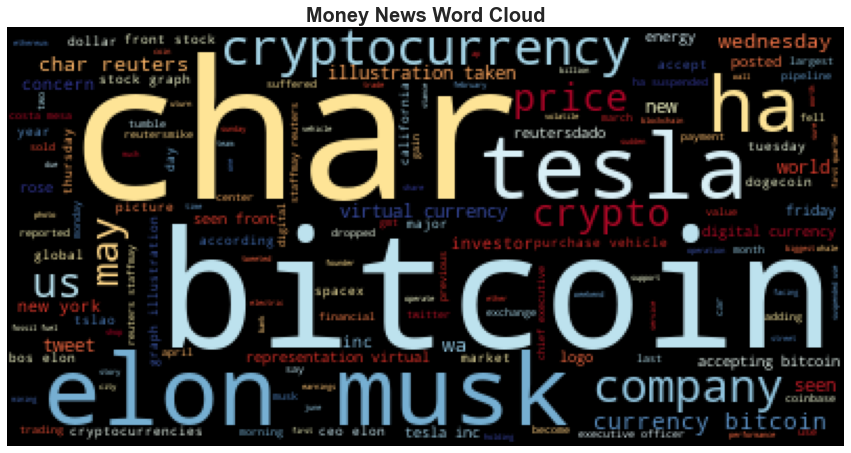

In [26]:
# Generate the Bitcoin word cloud
bitcoin_cloud_tokens = " ".join(bitcoin_tokens)
wordcloud = WordCloud(colormap="RdYlBu").generate(bitcoin_cloud_tokens)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize":20 , "fontweight": "bold"}
plt.title("Money News Word Cloud", fontdict=fontdict)
plt.show()


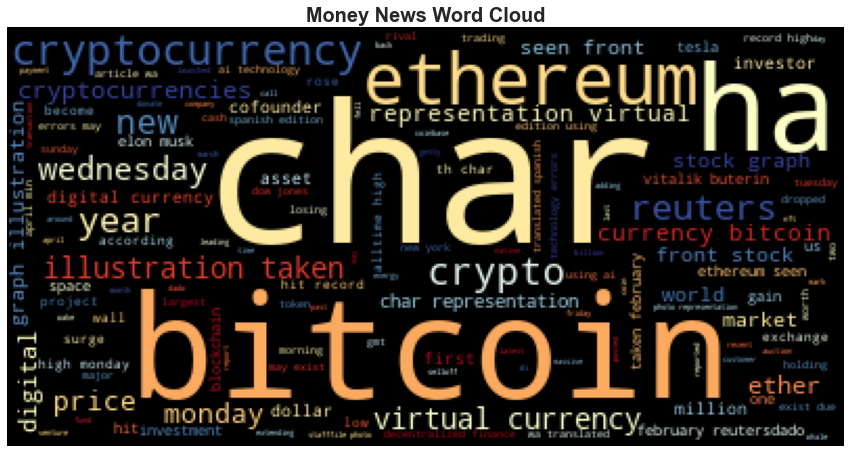

In [27]:
# Generate the Ethereum word cloud
ethereum_cloud_tokens = " ".join(ethereum_tokens)
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(ethereum_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20 , "fontweight": "bold"}
plt.title("Money News Word Cloud", fontdict=fontdict)
plt.show()



---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy 

spacy.cli.download("en_core_web_sm")


In [1]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [2]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
bitcoin_text = " ".join(bitcoin_df.text.to_list())
print(bitcoin_text)

Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars] Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars] Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars] Image: Tesla

 

 Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumption of fossil fuels, according to a statement CEO Elon Musk tw… [+853 chars] Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,000 f

In [28]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_text)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

NameError: name 'nlp' is not defined

In [ ]:
# Render the visualization
displacy.render(bitcoin_ner,style='ent')

In [29]:
# List all Entities
for entities in bitcoin_ner.ents:
    print(entities.text, entities.label_)

NameError: name 'bitcoin_ner' is not defined

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
ethereum_text = " ".join(ethereum_df.text.to_list())
print(ethereum_text)

Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.
Buterin transferred 500 ETH and … [+1667 chars] Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars] Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars] New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world's largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars] The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their latest project called Meebits. The proje

In [32]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_text)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(ethereum_ner,style='ent')

In [34]:
# List all Entities
for entities in ethereum_ner.ents:
    print(entities.text, entities.label_)

---